<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [6]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [8]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(Data_X.shape)
print(Train_X.shape)
print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
print(Vald_Y.shape)
print(Test_Y.shape)
 
print(Data_X.shape)
print(Data_Y.shape)

(22950, 5, 5000, 1)
(9180, 5, 5000, 1)
(6884, 5, 5000, 1)
(6886, 5, 5000, 1)
(22950, 9)
(9180, 9)
(6884, 9)
(6886, 9)
(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4991, 10)       210       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4982, 10)       1010      
_________________________________________________________________
average_pooling2d_28 (Averag (None, 4, 1245, 10)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 3, 1236, 50)       10050     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 3, 1227, 50)       25050     
_________________________________________________________________
average_pooling2d_29 (Averag (None, 3, 306, 50)        0     

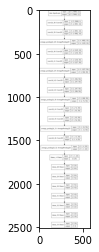

In [14]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 10, kernel_size = (2, 10),strides=(1, 1), activation = "relu") (inputs)
x = layers.Conv2D(filters = 10, kernel_size = (1, 10),strides=(1, 1), activation = "relu") (x)
x = layers.AveragePooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50, kernel_size = (2,10),strides = (1, 1),padding = 'valid', activation='relu') (x)
x = layers.Conv2D(filters = 50, kernel_size = (1,10),strides = (1, 1),padding = 'valid', activation='relu') (x)
x = layers.AveragePooling2D(pool_size = (1,4)) (x)
x = layers.Conv2D(filters = 50,kernel_size= (2, 10),strides = (1, 1), activation="relu")(x)
x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,4))(x)
x = layers.Conv2D(filters = 50,kernel_size= (2, 10),strides = (1, 1), activation="relu")(x)
x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,4))(x)
x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
x = layers.AveragePooling2D(pool_size = (1,4))(x)
x = layers.Flatten()(x)
#x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (x)
#block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
#x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
#block_2_output = layers.add([x, block_1_output])
 

#x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
#block_3_output = layers.add([x, block_2_output])


#x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)

#block_6_output = layers.add([x, block_3_output])
 
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
#block_7_output = layers.add([x, block_6_output])

#x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 




x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(42, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [15]:
history = model.fit(Train_X, Train_Y, epochs=200,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/200
46/46 - 6s - loss: 1.5690 - accuracy: 0.2797 - val_loss: 1.1634 - val_accuracy: 0.3662
Epoch 2/200
46/46 - 5s - loss: 1.0394 - accuracy: 0.4632 - val_loss: 0.9472 - val_accuracy: 0.5148
Epoch 3/200
46/46 - 5s - loss: 0.8155 - accuracy: 0.5605 - val_loss: 0.6660 - val_accuracy: 0.6551
Epoch 4/200
46/46 - 5s - loss: 0.5907 - accuracy: 0.6608 - val_loss: 0.6019 - val_accuracy: 0.6614
Epoch 5/200
46/46 - 5s - loss: 0.4954 - accuracy: 0.6988 - val_loss: 0.5119 - val_accuracy: 0.6665
Epoch 6/200
46/46 - 5s - loss: 0.4757 - accuracy: 0.7231 - val_loss: 0.4646 - val_accuracy: 0.7334
Epoch 7/200
46/46 - 5s - loss: 0.4380 - accuracy: 0.7460 - val_loss: 0.4556 - val_accuracy: 0.7347
Epoch 8/200
46/46 - 5s - loss: 0.4159 - accuracy: 0.7644 - val_loss: 0.4024 - val_accuracy: 0.7714
Epoch 9/200
46/46 - 5s - loss: 0.3982 - accuracy: 0.7857 - val_loss: 0.4021 - val_accuracy: 0.7561
Epoch 10/200
46/46 - 5s - loss: 0.4238 - accuracy: 0.7545 - val_loss: 0.4326 - val_accuracy: 0.7472
Epoch 11/

In [16]:
#Test_X,Test_Y = prepare_test_data()

Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
print(Test_X.shape)
print(Test_Y.shape)
print(to_categorical(Test_Y).shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(6886, 9, 2)
(9180, 9)
(9180, 9, 2)


In [60]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
print ('Testing  ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
print ('true (Test)     \n',Test_Y[:10].astype('int'))
print ('predicted (Test)\n',model.predict(Test_X[:10]).astype('int'))

print ('true (Train)     \n',Train_Y[:10].astype('int'))    
print ('predicted (Train)\n', model.predict(Train_X[:10]).astype('int'))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.08363087475299835, 0.94466233253479]
Testing   ['loss', 'accuracy']  =  [0.0841829776763916, 0.9442346692085266]
true (Test)     
 [[0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]]
predicted (Test)
 [[0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]]
true (Train)     
 [[0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]
predicted (Train)
 [[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


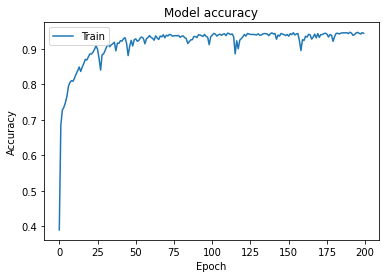

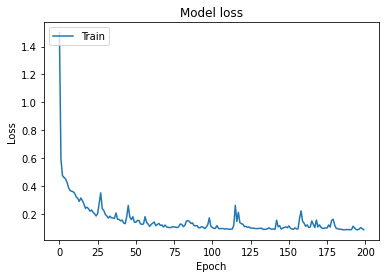

In [47]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]